Bibliotecas a usar

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime


In [32]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     -------------------------------------- 276.5/276.5 MB 6.5 MB/s eta 0:00:00
     ------------------------------------- 440.8/440.8 kB 26.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 27.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     ------------------------------------- 430.4/430.4 kB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 28.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 32.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.22.0 requires protobuf<4,>=3.12, but you have protobuf 4.24.2 which is incompatible.
google-cloud-core 1.7.2 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.22.0 which is incompatible.
google-api-core 1.31.5 requires google-auth<2.0dev,>=1.25.0, but you have google-auth 2.22.0 which is incompatible.


Funciones de Lecturas

In [4]:
def read_files(path=None):
    if path is None:
        files = [file for file in os.listdir() if '.csv' in file]
    else:
         files = [os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]
    
    data_dict = {}
    for file in files:
        df = pd.read_csv(file)
        filename = os.path.basename(file)
        data_dict[filename] = df
    
    return data_dict

In [2]:
def join_csv(path, out_file):
    if path is None:
        files = [file for file in os.listdir() if '.csv' in file]
    else:
        files = [os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]

    df = pd.concat(map(pd.read_csv, files), ignore_index=True)
    
    if out_file is not None:
        if path is None:
            df.to_csv(out_file)
        else:
            df.to_csv(os.path.join(path, out_file))
        
    return df

In [81]:
def join_csv(path, out_file):
    if path is None:
        files = [file for file in os.listdir() if '.csv' in file]
    else:
        files = [os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]

    df = pd.concat(map(pd.read_csv, files), ignore_index=True)
    
    if out_file is not None:
        if path is None:
            df.to_parquet(out_file)
        else:
            df.to_parquet(os.path.join(path, out_file))
        
    return df

In [3]:
def busqueda_numericas(data):
    columnas_num = []
    for column in data.columns:
        if data[column].dtype == 'int64':
            columnas_num.append(column)
    
    data_num = data[columnas_num]
    return data_num

In [77]:
def busqueda_categorica(data):
    columnas_cat = []
    for column in data.columns:
        if data[column].dtype == 'object':
            columnas_cat.append(column)
    
    data_cat = data[columnas_cat]
    return data_cat

In [82]:
join_csv("Data/Data_cobertura",'data_test_parquet')

PERIODO                              DESCRIPCION_COBERTURA  \
0         202201            Responsabilidad Civil Linderos Incendio   
1         202201            Danos Materiales a Consecuencia de Robo   
2         202201    Responsabilidad Civil   Suministro de Alimentos   
3         202201                        Daños por Agua al Contenido   
4         202201  Incendio sobre Bienes del Personal en Relacion...   
...          ...                                                ...   
1198322   202212                               Daños por Inundación   
1198323   202212                                Danos por Terremoto   
1198324   202212                               Equipos Electronicos   
1198325   202212                     Gastos por terremoto o temblor   
1198326   202212                           Asistencia Integral Pyme   

         SUMAASEGURADA  POL_IX  \
0           1733268.32       1   
1              5199.80       1   
2            693307.33       1   
3            173326.83       1   
4             17332.68       1   
...                ...     ...   
1198322        9955.57       1   
1198323    15630246.61       1   
1198324      318578.27       1   
1198325      781512.33       1   
1198326           0.00       1   

                                                KEY_CLIENT  
0        38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
1        38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
2        38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
3        38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
4        38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
...                                                    ...  
1198322  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  
1198323  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  
1198324  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  
1198325  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  
1198326  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  

[1198327 rows x 5 columns]

In [83]:
join_csv("Data/Data_propension",'data_test_parquet2')

PERIODO_PROP  PROP_PROD_0  PROP_PROD_1  PROP_PROD_2  PROP_PROD_3  \
0              202202          0.0          0.0          0.0          0.0   
1              202202          0.0          0.0          0.0          0.0   
2              202202          0.0          0.0          0.0          0.0   
3              202202          0.0          0.0          0.0          0.0   
4              202202          0.0          0.0          0.0          0.0   
...               ...          ...          ...          ...          ...   
3721297        202201          0.0          0.0          0.0          0.0   
3721298        202201          0.0          0.0          0.0          0.0   
3721299        202201          0.0          0.0          0.0          0.0   
3721300        202201          0.0          0.0          0.0          0.0   
3721301        202201          0.0          0.0          0.0          0.0   

         PROP_PROD_4  PROP_PROD_5  PROP_PROD_6  PROP_PROD_7  PROP_PROD_8  ...  \
0                0.0         3.49          0.0         3.40        13.55  ...   
1                0.0         4.78          0.0         3.57       125.88  ...   
2                0.0         0.00          0.0         0.00         0.00  ...   
3                0.0        12.67          0.0        11.04        60.78  ...   
4                0.0         2.56          0.0         2.44       178.97  ...   
...              ...          ...          ...          ...          ...  ...   
3721297          0.0         3.11          0.0         3.10       334.24  ...   
3721298          0.0         0.00          0.0         0.00         0.00  ...   
3721299          0.0         7.95          0.0         7.57       122.27  ...   
3721300          0.0         4.91          0.0         4.67       205.18  ...   
3721301          0.0         7.37          0.0         5.50        49.18  ...   

         PROP_PROD_26  PROP_PROD_27  PROP_PROD_28  PROP_PROD_29  PROP_PROD_30  \
0                 0.0           0.0           0.0          3.64         10.93   
1                 0.0           0.0           0.0          5.45          4.11   
2                 0.0           0.0           0.0          0.00          0.00   
3                 0.0           0.0           0.0         14.53         16.11   
4                 0.0           0.0           0.0          3.58          3.03   
...               ...           ...           ...           ...           ...   
3721297           0.0           0.0           0.0          4.66          2.79   
3721298           0.0           0.0           0.0          0.00          0.00   
3721299           0.0           0.0           0.0          9.57          8.00   
3721300           0.0           0.0           0.0          5.92         25.99   
3721301           0.0           0.0           0.0          6.64         20.79   

         PROP_PROD_31  PROP_PROD_32  PROP_PROD_33  PROP_PROD_34  \
0                7.54         20.97          4.52         61.96   
1                7.69         14.79          4.15         57.36   
2                0.00          0.00          0.00          0.00   
3               23.67         32.31         11.45        143.14   
4                7.00          9.55          3.39         20.07   
...               ...           ...           ...           ...   
3721297          6.54          7.80          3.28         87.57   
3721298          0.00          0.00          0.00          0.00   
3721299         20.51         19.64          8.57         30.92   
3721300         18.51         22.86          6.26         12.74   
3721301         15.58         24.83          6.43         26.78   

                                                KEY_CLIENT  
0        e9621d7106b8d432352754ebf07b311d5f7dfff76a6b99...  
1        8ec293458bee1729d685790f847b5ebf7756c0838d9ec5...  
2        7545c7650b55ceaa9b0f516818a4d4301a64d1fe7667f8...  
3        f8e33792b539a8dba6b4b0a8bb7d9983d9b2c0f80977c2...  
4        20daea1fe549fb3043d

Codigo del modelo Base

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Datos de entrada (secuencia de meses)
secuencia_cliente_1 = np.array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])
secuencia_cliente_2 = np.array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# Datos de salida (representación de seguros actuales)
seguros_cliente_1 = np.array([1, 1, 0, 0, 1])  # Ejemplo: El cliente 1 tiene seguros 1, 2, y 5
seguros_cliente_2 = np.array([1, 0, 0, 0, 0])  # Ejemplo: El cliente 2 solo tiene seguro 1

# Construye el modelo de RNN
model = Sequential()
model.add(LSTM(32, input_shape=(12, 1)))  # 12 meses como entrada, 1 unidad de tiempo
model.add(Dense(5, activation='sigmoid'))  # 5 seguros como salida

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo con los datos de ejemplo
X_train = np.array([secuencia_cliente_1, secuencia_cliente_2])
X_train = np.expand_dims(X_train, axis=-1)  # Agrega una dimensión para la entrada de tiempo
y_train = np.array([seguros_cliente_1, seguros_cliente_2])

model.fit(X_train, y_train, epochs=100, batch_size=2)

# Genera una recomendación para un nuevo cliente (simulado)
nuevo_cliente = np.array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
nuevo_cliente = np.expand_dims(nuevo_cliente, axis=0)

prediccion = model.predict(nuevo_cliente)

num_recomendaciones = 3  # Puedes ajustar este número según tus preferencias
recomendaciones = np.argsort(prediccion[0])[::-1][:num_recomendaciones]

print("Recomendación de seguros para el nuevo cliente:", recomendaciones)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6924 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6888 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6852 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6816 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6779 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6743 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6705 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6667 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6629 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6589 - accuracy: 1.0000
Epoch 11/100


Funciones de Limpieza por cada DataSet

In [154]:
def Pyme(data):
    data.rename(columns= {'LOCALIDAD': 'CIUDAD'}, inplace=True)
    data['PROVINCIA'] = data.apply(lambda row: 'Ciudad Autónoma de Buenos Aires' if row['CIUDAD'] == 'CABA' else row['PROVINCIA'], axis=1)
    data['PROVINCIA'] = data.apply(lambda row: 'Tierra del Fuego' if row['PROVINCIA'] == 'Ushuaia' else row['PROVINCIA'], axis=1)

    columnas = ['Q_EMPLEADOS',	'PAGO_SUELDO_CCSS',	'PERFIL_INVERSOR',	'SCORING_CREDITICIO',	'KEY_CLIENT', 'Unnamed: 12' ]

    Lista_filaNew = []
    for index, row in data.iterrows():
        valor = row['Unnamed: 12']
        if isinstance(valor, str) and not valor.isnumeric():
            Lista_filaNew.append(index)
            print(f"Fila {index}, Columna {'Unnamed: 12'}: Valor no numérico = {valor}")

    for fila in Lista_filaNew:
        valor_C = data.at[fila, "Q_EMPLEADOS"]
        valor_D = data.at[fila, "PAGO_SUELDO_CCSS"]
        valor_E = data.at[fila, "PERFIL_INVERSOR"]
        valor_F = data.at[fila, "SCORING_CREDITICIO"]
        valor_G = data.at[fila, "KEY_CLIENT"]
        Valor_H = data.at[fila, "Unnamed: 12"]
        
        data.at[fila, "RENTABILIDAD"] = valor_C
        data.at[fila, "Q_EMPLEADOS"] = valor_D
        data.at[fila, "PAGO_SUELDO_CCSS"] = valor_E
        data.at[fila, "PERFIL_INVERSOR"] = valor_F 
        data.at[fila, "SCORING_CREDITICIO"] = valor_G
        data.at[fila, "KEY_CLIENT"] = Valor_H

    data.at[fila, columnas[-1]] = None

    data['Q_EMPLEADOS'] = data['Q_EMPLEADOS'].astype(int)
    data['PAGO_SUELDO_CCSS'] = data['PAGO_SUELDO_CCSS'].str.replace('[^\d.]', '', regex=True).astype(float)
    data['SCORING_CREDITICIO'] = data['SCORING_CREDITICIO'].str.replace('.', '').astype(int)
    data.drop(['id'], axis=1, inplace=True)
    data.drop(["Unnamed: 12"], axis=1, inplace=True)

    return data

In [168]:
def Limpieza_personas(data, data_pyme):

    merged_data = data.merge(data_pyme[['KEY_CLIENT', 'PROVINCIA']], on='KEY_CLIENT', how='left')
    data['PROVINCIA'] = merged_data['PROVINCIA_x'].fillna(merged_data['PROVINCIA_y'])
    data.replace({'Capital Federal': 'Ciudad Autonoma Buenos Aires'}, inplace=True)

    Dic2 = {'Ciudad Autonoma Buenos Aires': 'Ciudad Autónoma de Buenos Aires', 'Tucuman':'Tucumán', 'Cordoba':'Córdoba', 'Entre Rios': 'Entre Ríos', 'Neuquen': 'Neuquén', 'Rio Negro':'Río Negro'}
    data = data.replace(Dic2)
   
    return data

In [58]:
def Limpieza_datos_coberturas(data):
    data.drop(['Unnamed: 0'],axis = 1, inplace=True)
    data['DESCRIPCION_COBERTURA'] = data['DESCRIPCION_COBERTURA'].str.replace(r'\xa0', ' ')
    data['DESCRIPCION_COBERTURA'] = data['DESCRIPCION_COBERTURA'].str.replace(r'\s{2,}', ' ', regex=True).str.strip()
    df_encoded = pd.get_dummies(data, prefix = 'Cobertura', columns=['DESCRIPCION_COBERTURA'])
    df_agrupado = df_encoded.groupby(['PERIODO', 'KEY_CLIENT']).sum().reset_index()
    df_agrupado['PERIODO'] = pd.to_datetime(df_agrupado['PERIODO'], format='%Y%m').dt.strftime("%Y-%m")
    df_agrupado
    return df_agrupado


In [12]:
def Limpieza_datos_risk(data):

    for columna in data.iloc[:, 1:].columns:
        data[columna] = data[columna].str.replace(",", ".").astype(float)


    Dic = {' Ciudad Autonoma Buenos Aires':'Ciudad Autónoma de Buenos Aires', 'Buenos Aires': 'Buenos Aires', ' San Luis': 'San Luis', ' Chaco':'Chaco', ' Chubut':'Chubut', ' Entre Rios':'Entre Ríos', ' La Pampa': 'La Pampa', 'Formosa': 'Formosa', ' Cordoba': 'Córdoba',
       ' Catamarca':'Catamarca', ' Corrientes': 'Corrientes', ' Jujuy':'Jujuy', ' La Rioja': 'La Rioja', ' Mendoza':'Mendoza', ' Rio Negro':'Río Negro', ' Salta':'Salta', ' San Juan': 'San Juan', ' Misiones': 'Misiones', ' Neuquen': 'Neuquén',
       ' Santiago del Estero': 'Santiago del Estero', ' Tucuman': 'Tucumán', ' Tierra del Fuego': 'Tierra del Fuego', ' Santa Cruz': 'Santa Cruz', ' Santa Fe': 'Santa Fe'}
    
    data = data.replace(Dic)
    

    return data

In [102]:
def Limpieza_siniestros(data):
    
    data = data.replace(Dic1)

    fecha_columns = ['FECHA_DENUNCIA', 'FECHA_OCURRENCIA', 'FECHA_CIERRE']
    for col in fecha_columns:
        data[col] = pd.to_datetime(data[col], format='%Y-%m-%d')

    data['FECHA_DENUNCIA'] = data['FECHA_DENUNCIA'].dt.strftime('%Y-%m-%d')

    data['diferencia'] = (data['FECHA_CIERRE'] - data['FECHA_OCURRENCIA']).dt.days

    data['DIFF_DENUNCIA_CIERRE'].fillna(data['diferencia'], inplace=True)

    data['DIFF_DENUNCIA_CIERRE'] = data['DIFF_DENUNCIA_CIERRE'].apply(lambda x: round(x) if pd.notna(x) else x)

    mask = data['DIFF_DENUNCIA_PAGO'].isna()

    data.loc[mask, 'FLG_RECHAZO'] = 1

    data['FLG_RECHAZO'] = data.apply(lambda row: 1 if row['FLG_PAGO'] == 0 else row['FLG_RECHAZO'], axis=1)

    data['DIFF_DENUNCIA_PAGO'].fillna(0, inplace=True)

    bins = [-np.inf, 1, 20, 30, 100]
    labels = ['Inmediato', 'Menor a 30 días', 'Mayor a 30 días', 'Demorado']
    data['Categoría días pagos'] = np.where(data['FLG_PAGO'] == 1, pd.cut(data['DIFF_DENUNCIA_PAGO'], bins=bins, labels=labels), 'No pago')
    
    return data


In [21]:
def Limpieza_tenencias(data):
    columnas = data.iloc[:,:42]

    data['Total_coberturas'] = columnas.sum(axis=1)
    data['Cantidad_real_vigentes'] = data.apply(lambda row: row['CANT_POL_VIGENTES'] <= (row['FLG_SIP_VIGENTE'] + row['Total_coberturas']), axis=1)
    name_columns = ['CANT_POL_VIGENTES', 'FLG_SIP_VIGENTE', 'Total_coberturas']  
    condicion0 = (data['FLG_SIP_VIGENTE'] == 0) & (data['CANT_POL_VIGENTES'] >= (data['FLG_SIP_VIGENTE'] + data['Total_coberturas']))
    data['CANT_POL_VIGENTES'] = np.where(condicion0, data['Total_coberturas'], data['CANT_POL_VIGENTES'])
    condicion1 = (data['FLG_SIP_VIGENTE'] == 0) & (data['CANT_POL_VIGENTES'] >= (data['FLG_SIP_VIGENTE'] + data['Total_coberturas']))
    data['CANT_POL_VIGENTES'] = np.where(condicion1, data['Total_coberturas'], data['CANT_POL_VIGENTES'])
    condicion2 = (data['FLG_SIP_VIGENTE'] == 1) & (data['CANT_POL_VIGENTES'] >= (data['FLG_SIP_VIGENTE'] + data['Total_coberturas']))
    data['CANT_POL_VIGENTES'] = np.where(condicion2, data['Total_coberturas']+data['FLG_SIP_VIGENTE'], data['CANT_POL_VIGENTES'])

    columnas_core1 = data.filter(like='_CORE_1')
    suma_core1 = columnas_core1.sum(axis=1)

    columnas_core2 = data.filter(like='_CORE_2')
    suma_core2 = columnas_core2.sum(axis=1)

    data['Suma_core1'] = suma_core1
    data['Suma_core2'] = suma_core2

    column_names = data.columns.tolist()

    column_names.insert(43, column_names.pop(42))
    

    return data

In [146]:
# def Limpieza_tenencias(data):
    
#     data['Cantidad_real_vigentes'] = data.apply(lambda row: row['CANT_POL_VIGENTES'] <= (row['FLG_SIP_VIGENTE'] + row['Total_coberturas']), axis=1)

#     columnas = data.iloc[:,:42]
#     data['Total_coberturas'] = columnas.sum(axis=1)

#     name_columns = ['CANT_POL_VIGENTES', 'FLG_SIP_VIGENTE', 'Total_coberturas']

#     for index, row in data.iterrows():
#         cant_pol_vigentes = row['CANT_POL_VIGENTES']
#         flg_sip_vigente = row['FLG_SIP_VIGENTE']
#         total_coberturas = row['Total_coberturas']

#         cantidad_real_vigentes = cant_pol_vigentes <= (flg_sip_vigente + total_coberturas)

#         data.at[index, 'Cantidad_real_vigentes'] = cantidad_real_vigentes

#         condicion = (data['FLG_SIP_VIGENTE'] == 0) & (data['CANT_POL_VIGENTES'] >= (data['FLG_SIP_VIGENTE'] + data['Total_coberturas']))
#         data['CANT_POL_VIGENTES'] = np.where(condicion, data['Total_coberturas'], data['CANT_POL_VIGENTES'])

#         condicion1 = (data['FLG_SIP_VIGENTE'] == 1) & (data['CANT_POL_VIGENTES'] >= (data['FLG_SIP_VIGENTE'] + data['Total_coberturas']))
#         data['CANT_POL_VIGENTES'] = np.where(condicion, data['Total_coberturas']+data['FLG_SIP_VIGENTE'], data['CANT_POL_VIGENTES'])

#     return data

In [111]:
def Limpieza_contactos(data):
    data['FECHA_GESTION'] = pd.to_datetime(data['FECHA_GESTION'], format='%Y-%m-%d').dt.strftime("%Y-%m-%d")
    data['DESC_GEST'] = data.apply(lambda row: 'GESTIONES' if pd.isna(row['DESC_GEST']) and row['FLG_WPP'] == 0 else row['DESC_GEST'], axis=1)
    
    mask_0 = pd.isna(data['DESC_GEST'])
    mask_1 = data['FLG_WPP'] == 1
    data_wapp = data[mask_0 & mask_1]
    distribucion_reemplazo = {
    'SOLICITA POLIZA': 0.50,
    'POST-VENTA-ASESORAMIENTO': 0.50,
    }
    valores_de_reemplazo = np.random.choice(list(distribucion_reemplazo.keys()), size=len(data_wapp), p=list(distribucion_reemplazo.values()))
    data_wapp['DESC_GEST']= valores_de_reemplazo

    indices_comunes = data.index.intersection(data_wapp.index)
    data.loc[indices_comunes] = data_wapp.loc[indices_comunes]

    data['cant_contactos_tipo_DESC_GEST'] = data.groupby('KEY_CLIENT')['DESC_GEST'].transform('count')
    return data

In [52]:
def Limpieza_certificados(data):
    data_columns = ['ANTIGUEDAD_CLIENTE', 'ANTIGUEDAD_POLIZA_MAS_RECIENTE']
    
    for column in data_columns:
        if data[column].dtype == 'int64':
            fecha_referencia = datetime.date(2022, 12, 31)
            fecha_referencia = pd.to_datetime(fecha_referencia)
            data['ANTIGUEDAD_CLIENTE'] = pd.to_timedelta(data['ANTIGUEDAD_CLIENTE'], unit='D')
            data['fecha_antiguedad_cliente'] = fecha_referencia - data['ANTIGUEDAD_CLIENTE']
            data['ANTIGUEDAD_POLIZA_MAS_RECIENTE'] = pd.to_timedelta(data['ANTIGUEDAD_POLIZA_MAS_RECIENTE'], unit='D')
            data['fecha_antiguedad_ulit_poliza'] = fecha_referencia - data['ANTIGUEDAD_POLIZA_MAS_RECIENTE']
        else:
            None

    data['fecha_sin_interaccion'] = data.apply(lambda row: row['ANTIGUEDAD_CLIENTE'] if row['ANTIGUEDAD_CLIENTE'] == row['ANTIGUEDAD_POLIZA_MAS_RECIENTE'] else row['ANTIGUEDAD_CLIENTE'] - row['ANTIGUEDAD_POLIZA_MAS_RECIENTE'], axis=1)
    
    return data




DATASETS DISPONIBLES

In [86]:
data_propension = pd.read_csv("Data/Data_propension/data_test",delimiter=',')

In [63]:
data_cobertura_2022 = pd.read_csv("Data/Data_cobertura/data_test", delimiter=',')

In [4]:
data_personas = pd.read_csv("Data/personas.csv")

In [10]:
data_delitos = pd.read_csv("Data/snic-provincias.csv")

In [100]:
data_siniestros = pd.read_csv("Data/siniestros.csv")

In [17]:
data_tenencias = pd.read_csv("Data/tenencia.csv")

In [112]:
data_contactos = pd.read_csv("Data/contactos.csv", delimiter=',')

In [ ]:
data_certificado = pd.read_csv("Data/certificados.csv", delimiter=',')

In [117]:
data_mipyme2 = pd.read_csv("Data/registro_mipyme_04-08-2023.csv", delimiter=';')

In [16]:
data_pyme = pd.read_csv("Data/pyme.csv", delimiter=';')

c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
data_risks = pd.read_csv("Data/ArgentinaRisks.csv", delimiter=';')

In [24]:
data_risks_delincuencia = pd.read_csv("Data/snic-provincias.csv", delimiter=',')

Gestion de Los Datos

In [87]:
List_Data = [data_propension, data_cobertura_2022, data_contactos,data_certificado,data_personas,data_pyme,data_siniestros,data_tenencias]

for data in List_Data:
    
    print(data.isna().sum()/data.shape[0]*100)


Unnamed: 0      0.000000
PERIODO_PROP    0.000000
PROP_PROD_0     0.000027
PROP_PROD_1     0.000027
PROP_PROD_2     0.000027
PROP_PROD_3     0.000027
PROP_PROD_4     0.000027
PROP_PROD_5     0.000027
PROP_PROD_6     0.000027
PROP_PROD_7     0.000027
PROP_PROD_8     0.000027
PROP_PROD_9     0.000027
PROP_PROD_10    0.000027
PROP_PROD_11    0.000027
PROP_PROD_12    0.000027
PROP_PROD_13    0.000027
PROP_PROD_14    0.000027
PROP_PROD_15    0.000027
PROP_PROD_16    0.000027
PROP_PROD_17    0.000027
PROP_PROD_18    0.000027
PROP_PROD_19    0.000027
PROP_PROD_20    0.000027
PROP_PROD_21    0.000027
PROP_PROD_22    0.000027
PROP_PROD_23    0.000027
PROP_PROD_24    0.000027
PROP_PROD_25    0.000027
PROP_PROD_26    0.000027
PROP_PROD_27    0.000027
PROP_PROD_28    0.000027
PROP_PROD_29    0.000027
PROP_PROD_30    0.000027
PROP_PROD_31    0.000027
PROP_PROD_32    0.000027
PROP_PROD_33    0.000027
PROP_PROD_34    0.000027
KEY_CLIENT      0.000000
dtype: float64
PERIODO                  0.0
DESCRI

In [90]:
Labels = ['data_propension_2022', 'data_cobertura_2022', 'data_contactos','data_certificado','data_personas','data_pyme','data_siniestros','data_tenencias']
List_NaN = []
List_size = []
for data in List_Data:
    total_datos = data.size
    total_NaN = data.isna().sum().sum()
    List_NaN.append(total_NaN)
    List_size.append(total_datos)

print(sum(List_size))
print(sum(List_NaN))
print(sum(List_size) - sum(List_NaN))


In [129]:
Labels2 = ['Datos', 'NaN']
Values_datos = [161871908, 1117431]
fig = go.Figure()
colores = ['rgb(217,72,1)',
 'rgb(255,245,235)']
fig.add_trace(go.Pie(labels=Labels2, values=Values_datos, hole=0.3, name='Total de Datos Limpios & NaN', marker=dict(colors=colores)))

fig.update_traces(textinfo='percent+label')
fig.update_layout(title='Distribución de Datos', barmode='stack')

fig.update_layout(width=800, height=600)

fig.show()

In [114]:
fig = go.Figure()
colores = px.colors.sequential.Oranges[:len(Labels)]

fig.add_trace(go.Pie(labels=Labels, values=List_size, hole=0.3, name='Total de Datos', marker=dict(colors=colores)))

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Distribución de Datos', barmode='stack')

fig.update_layout(width=1000, height=600)

fig.show()

In [124]:
fig = go.Figure()
colores = px.colors.sequential.Oranges[:len(Labels)]
fig.add_trace(go.Pie(labels=Labels, values=List_NaN, hole=0.6, name='Valores NaN', marker=dict(colors=colores)))

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Distribución de Valores NaN por Dataset', barmode='stack')

fig.update_layout(width=1000, height=600)


fig.show()

Funciones para Graficos. 

In [124]:
def linea_tendencia(data, y, x, group, title):
    fig = px.line(data, y=y, x=x, color=group, line_group=group,
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.Dark2,
             title=title)

    fig.update_layout(legend_traceorder="reversed")
    fig.update_layout(width=1000, height=600)

    return fig

In [121]:
def scatter_plot(data,x, y, group,title):

    colores_personalizados = px.colors.qualitative.Dark2[::-1] 

    fig = px.scatter(data, x=x, y=y, color=group,
             color_discrete_sequence=colores_personalizados,
             title=title
            )

    fig.update_layout(width=1000, height=600)
    
    return fig  

In [147]:
def count_plots(data, hue, x, title):
    fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(10,6))

    sns.countplot(x=x, hue=hue,data=data, ax=axs, palette="YlOrBr")
    sns.color_palette(palette="YlOrBr", n_colors=None, desat=None, as_cmap=False)

    axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)

    plt.legend(title=title, fontsize='small', title_fontsize='12', loc='upper right')

    fig.tight_layout()

    plt.show()

    return

In [137]:
def barra_plot(data,x,y, title,labels,xlabel,ylabel):
    fig = px.bar(data, x=x, y=y,
                title=title,
                labels=labels,
                height=400, color_discrete_sequence=px.colors.sequential.Oranges)

    fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)

    fig.update_layout(width=1000, height=600)

    return fig

In [96]:
def pie_graph(data, values, name, title):
    fig = px.pie(data, values=values, names=name, title=title,
                color_discrete_sequence=px.colors.sequential.Oranges)

    fig.update_traces(textposition='inside', textinfo='percent+label')

    fig.update_layout(width=1000, height=600)

    return fig

In [52]:
def pair_plot(data, hue, title):
    fig, axs = plt.subplots(figsize=(10,6))

    sns.pairplot(data, hue=hue, palette = "YlOrBr")

    plt.legend(title=title, fontsize='small', title_fontsize='12', loc='upper right', palette = "YlOrBr")

    fig.tight_layout()

    plt.show()
    return fig

In [54]:
def scatter_size(data, x, hue, y, size):
    
    f, ax = plt.subplots(figsize=(12, 10))

    sns.despine(f, left=True, bottom=True)

    sns.scatterplot(x=x, y=y,
                    hue=hue,
                    palette="YlOrBr",
                    sizes=(5, 100), linewidth=0, size=size,
                    data=data, ax=ax)
    plt.show()

    return fig

Graficos Sobre la Data

    Historico Sobre Cobertura 2022

In [65]:
data_baja = data_cobertura_2022[data_cobertura_2022['SUMAASEGURADA']== 0]
df_agrupado_baja = Limpieza_datos_coberturas(data_baja)

c:\Users\102140\Anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\102140\AppData\Local\Temp\ipykernel_11172\3425011720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DESCRIPCION_COBERTURA'] = data['DESCRIPCION_COBERTURA'].str.replace(r'\xa0', ' ')
C:\Users\102140\AppData\Local\Temp\ipykernel_11172\3425011720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

PERIODO                                         KEY_CLIENT  \
0      2022-01  00075edace2c788bb2702a2c13712a4bbb9698f17d50a7...   
1      2022-01  000f722307fa8c6ea4b6224aef422cbc5e2b9323ddac99...   
2      2022-01  00307e443cce59a4226135fdaad824b6915f3e64aace34...   
3      2022-01  0033cf13031729d48422ea1b52f4c97b2a58898dab16e3...   
4      2022-01  005182c646dac401f2d46e8e07d22699df2dddfefb2725...   
...        ...                                                ...   
41054  2022-12  ffe16c37b71cf526d6432cdc85105e05be746318016c93...   
41055  2022-12  ffe637bc36b336f79e3b736051c60fce042c33a8d5cc42...   
41056  2022-12  fff04648d382b20cae773ea70738beb10bd62c3d4aae8f...   
41057  2022-12  fff3ea9bd3d5c48c34424236f9f6fac53cbb018f4fa649...   
41058  2022-12  fffe23bb24852931d0b4e561f9bb1de6e3a0f828bec508...   

       SUMAASEGURADA  POL_IX  Cobertura_Asistencia Integral Pyme  \
0                0.0       1                                   1   
1                0.0       1                                   1   
2                0.0       1                                   1   
3                0.0       1                                   1   
4                0.0       3                                   2   
...              ...     ...                                 ...   
41054            0.0       2                                   1   
41055            0.0       1                                   0   
41056            0.0       2                                   1   
41057            0.0       2                                   1   
41058            0.0       2                                   1   

       Cobertura_Daños por Agua al Contenido  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
41054                                      0   
41055                                      0   
41056                                      0   
41057                                      0   
41058                                      0   

       Cobertura_Falta de Frio Sin Contaminacion  Cobertura_Giro Comercial  \
0                                              0                         0   
1                                              0                         0   
2                                              0                         0   
3                                              0                         0   
4                                              0                         0   
...                                          ...                       ...   
41054                                          0                         0   
41055                                          0                         0   
41056                                          0                         0   
41057                                          0                         0   
41058                                          0                         0   

       Cobertura_Impacto de Vehiculos Terrestres para Instalaciones Externas  \
0                                                      0                       
1                                                      0                       
2                                                      0                       
3                                                      0                       
4                                                      0                       
...                                                  ...                       
41054                                                  0                       
41055                                                  0                       
41056                                                  0                       
41057                                          

In [66]:
df_agrupado_2022 = Limpieza_datos_coberturas(data_cobertura_2022)

PERIODO                                         KEY_CLIENT  \
0      2022-01  00075edace2c788bb2702a2c13712a4bbb9698f17d50a7...   
1      2022-01  000f722307fa8c6ea4b6224aef422cbc5e2b9323ddac99...   
2      2022-01  00307e443cce59a4226135fdaad824b6915f3e64aace34...   
3      2022-01  0033cf13031729d48422ea1b52f4c97b2a58898dab16e3...   
4      2022-01  005182c646dac401f2d46e8e07d22699df2dddfefb2725...   
...        ...                                                ...   
41054  2022-12  ffe16c37b71cf526d6432cdc85105e05be746318016c93...   
41055  2022-12  ffe637bc36b336f79e3b736051c60fce042c33a8d5cc42...   
41056  2022-12  fff04648d382b20cae773ea70738beb10bd62c3d4aae8f...   
41057  2022-12  fff3ea9bd3d5c48c34424236f9f6fac53cbb018f4fa649...   
41058  2022-12  fffe23bb24852931d0b4e561f9bb1de6e3a0f828bec508...   

       SUMAASEGURADA  POL_IX  Cobertura_Asistencia Integral Pyme  \
0       5.251620e+07      21                                   1   
1       4.919250e+07      30                                   1   
2       9.544368e+07      23                                   1   
3       3.541823e+07      22                                   1   
4       9.340813e+07      60                                   2   
...              ...     ...                                 ...   
41054   3.492934e+07      20                                   1   
41055   1.264035e+08      23                                   0   
41056   1.259622e+08      25                                   1   
41057   3.882000e+07      25                                   1   
41058   4.404184e+07      22                                   1   

       Cobertura_Cristales  Cobertura_Danos Materiales a Consecuencia de Robo  \
0                        1                                                  1   
1                        1                                                  1   
2                        1                                                  1   
3                        1                                                  1   
4                        2                                                  2   
...                    ...                                                ...   
41054                    1                                                  1   
41055                    1                                                  1   
41056                    1                                                  1   
41057                    1                                                  1   
41058                    1                                                  1   

       Cobertura_Danos por Terremoto  Cobertura_Daños por Agua al Contenido  \
0                                  1                                      0   
1                                  1                                      1   
2                                  1                                      1   
3                                  1                                      0   
4                                  2                                      0   
...                              ...                                    ...   
41054                              1                                      0   
41055                              1                                      1   
41056                              1                                      1   
41057                              1                                      1   
41058                              1                                      1   

       Cobertura_Daños por Inundación  ...  \
0                                   0  ...   
1                                   1  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   
...                               ...  ...   
41054                               0  ...   
41055                               1  ...   
41056                    

In [73]:
data_cobertura_2022['PERIODO'] = pd.to_datetime(data_cobertura_2022['PERIODO'], format='%Y%m').dt.strftime("%Y-%m")
data_cobertura_2022[(data_cobertura_2022['DESCRIPCION_COBERTURA'] == 'Asistencia Integral Pyme') & (data_cobertura_2022['PERIODO'] == '2022-01') ]

PERIODO     DESCRIPCION_COBERTURA  SUMAASEGURADA  POL_IX  \
13     2022-01  Asistencia Integral Pyme            0.0       1   
50     2022-01  Asistencia Integral Pyme            0.0       1   
76     2022-01  Asistencia Integral Pyme            0.0       1   
97     2022-01  Asistencia Integral Pyme            0.0       1   
120    2022-01  Asistencia Integral Pyme            0.0       1   
...        ...                       ...            ...     ...   
81514  2022-01  Asistencia Integral Pyme            0.0       1   
81537  2022-01  Asistencia Integral Pyme            0.0       1   
81571  2022-01  Asistencia Integral Pyme            0.0       1   
81592  2022-01  Asistencia Integral Pyme            0.0       1   
81619  2022-01  Asistencia Integral Pyme            0.0       1   

                                              KEY_CLIENT  
13     38a92d0e63cd51f437e2147c9072eca01675f8f346c019...  
50     86d4f9d88be7d784f8ad42e0d54919f49d3d1b47baab41...  
76     cf377480e62bb153676d620521b52ae1c687b4c3a92cee...  
97     c23e0d4247a4feb8bd0c91780898f52af6f35cde1e4d27...  
120    eb77b0e77f24a36ff2ebd9c61122ca3ec8785cd40ffe26...  
...                                                  ...  
81514  4ab9a7c2f19325c8d22a8cbfe51113318b9fa16cfad264...  
81537  aa5a9960ec00348192033b04b14ad52bb0ad87951706e0...  
81571  20250d190950ef59d7e57087195363b2ec5798ca143aa0...  
81592  61da75831d8598ab9a13d7dcf4e076445d6f6631d62f5f...  
81619  cfe3ffb26317798e3ce9ed70fe9ffaa6e4080d8009b2ec...  

[3397 rows x 5 columns]

In [74]:
Suma_data = data_cobertura_2022.groupby(by=['PERIODO','DESCRIPCION_COBERTURA'])['POL_IX'].count().reset_index()

Suma_data['PERIODO'] = pd.to_datetime(Suma_data['PERIODO'], dayfirst=True)

data_mes_a_mes = Suma_data.groupby(['DESCRIPCION_COBERTURA', pd.Grouper(key='PERIODO', freq='M')])['POL_IX'].sum().reset_index()

DESCRIPCION_COBERTURA    PERIODO  POL_IX
0       Asistencia Integral Pyme 2022-01-31    3397
1       Asistencia Integral Pyme 2022-02-28    3480
2       Asistencia Integral Pyme 2022-03-31    3608
3       Asistencia Integral Pyme 2022-04-30    3700
4       Asistencia Integral Pyme 2022-05-31    3845
..                           ...        ...     ...
860  Vandalismo y o Malevolencia 2022-08-31    4392
861  Vandalismo y o Malevolencia 2022-09-30    4524
862  Vandalismo y o Malevolencia 2022-10-31    4724
863  Vandalismo y o Malevolencia 2022-11-30    4876
864  Vandalismo y o Malevolencia 2022-12-31    4909

[865 rows x 3 columns]

In [94]:
linea_tendencia(Suma_data, Suma_data['POL_IX'], Suma_data['PERIODO'], Suma_data['DESCRIPCION_COBERTURA'], "Serie de tiempo por los distintos tipos de coberturas 2022")

In [82]:
Suma_mes_test = Suma_data.groupby(by=['DESCRIPCION_COBERTURA'])['POL_IX'].sum().reset_index()

In [97]:
Suma_mes_test.loc[Suma_mes_test['POL_IX'] < 48000, 'DESCRIPCION_COBERTURA'] = 'Otras Coberturas'
pie_graph(Suma_mes_test, 'POL_IX', 'DESCRIPCION_COBERTURA', 'Distribucion de Coberturas 2022')

In [ ]:
#Que mes se adquirieron mas seguros y porque

    Siniestro Historico Durante 2022

In [98]:
Dic1 = {'HA-TensiÃ³n':'HA-Tension', 'HN-Granizo': 'HN-Granizo', 'HA-Rotura Otros Bienes o ArtÃ\xadc':'HA-Rotura Otros Bienes o Art',
       'HD - Robo con Efraccion': 'HD-Robo con Efraccion', 'HA - Caida de Objeto':'HA-Caida de Objeto' , 'HD-Hurto':'HD-Hurto',
       'HN-Rayo':'HN-Rayo', 'HN - Rayo':'HN-Rayo', 'HA - TensiÃ³n':'HA-Tension',
       'HA - DaÃ±o por Humo y HollÃ­n':'HA-Daño por Humo y Hollin', 'HA-CaÃ\xadda de objeto':'HA-Caida de Objeto',
       'HA-Rotura de Cristales':'HA-Rotura de Cristales', 'HD-Robo con EfracciÃ³n':'HD-Robo con Efraccion',
       'HA-Cortocircuito':'HA-Cortocircuito', 'Robo de celular':'HD-Daños por Robo o Tentativa',
       'Robo Equipos ElectrÃ³nicos':'HD-Daños por Robo o Tentativa', 'HA-Incendio':'HA-Incendio', 'HN-Temporal':'HN-Temporal',
       'Robo en Cajero':'HD-Daños por Robo o Tentativa', 'Robo de Celular':'HD-Daños por Robo o Tentativa', 'HA - Incendio':'HA-Incendio',
       'HA - Rotura de Cristales':'HA-Rotura de Cristales', 'HD - Robo por Asalto':'HD-Robo por Asalto',
       'HA - Derrumbe':'HA-Derrumbe', 'Robo VÃ\xada Publica':'HD-Daños por Robo o Tentativa',
       'HD-DaÃ±os por Robo o Tentativa':'HD-Daños por Robo o Tentativa', 'HA - DaÃ±o por Agua/Humedad':'HA-Daños por Agua/Humedad',
       'HA-DaÃ±o por agua/Humedad':'HA-Daños por agua/Humedad', 'PÃ©rdida Alimentos':'HA-Rotura Otros Bienes o Art',
       'Fallecimiento Enf. Mascota':'Otros accidentes', 'RC Responsabilidad civil':'HA-Impacto Vehiculo Terrestre',
       'HA - CaÃ\xadda de objeto':'HA-Caida de Objeto', 'HA - Rotura Otros Bienes o Art':'HA-Rotura Otros Bienes o Art',
       'Robo Bienes':'HD-Daños por Robo o Tentativa', 'HD - DaÃ±os Robo o Tentativa':'HD-Daños por Robo o Tentativa',
       'HA - Impacto vehÃ\xadculo terr':'HA-Impacto Vehiculo Terrestre', 'RC-Responsabilidad Civil':'HA-Impacto Vehiculo Terrestre',
       'HN - Temporal':'HN-Temporal', 'HA - Impacto Vehiculo Terr':'HA-Impacto Vehiculo Terrestre',
       'DaÃ±o por Accidente':'Otros accidentes', 'HD-Robo por Arrebato':'HD-Robo por Arrebato',
       'Estancia en Residencia Mascota':'Otros accidentes', 'HA - ExplosiÃ³n':'HA-Explosion', 'HD - Hurto':'HD-Hurto',
       'HA - ColisiÃ³n':'HA-Colision', 'DaÃ±o Accidental':'Otros accidentes', 'Otros accidentes':'Otros accidentes',
       'Gastos Asistencia Veterinaria':'Otros accidentes', 'HA - Impacto de aeronave':'HA-Impacto de aeronave',
       'HN - HuracÃ¡n':'HN-Huracan', 'Otras enfermedades':'Otros accidentes', 'HN - Granizo':'HN-Granizo',
       'Gastos por Sacrificio':'Otros accidentes', 'Gastos por ExtravÃ\xado':'HA-Rotura Otros Bienes o Art',
       'HD - Robo por Arrebato':'HD-Robo por Arrebato', 'Fallecimiento Acc. Mascota':'Otros accidentes'}

In [103]:
data_new_siniestro = Limpieza_siniestros(data_siniestros)

In [104]:
Suma_data = data_new_siniestro.groupby(by=['FECHA_OCURRENCIA','CAUSA_SINIESTRO'])['FLG_PAGO'].count().reset_index()

Suma_data['FECHA_OCURRENCIA'] = pd.to_datetime(Suma_data['FECHA_OCURRENCIA'], dayfirst=True)

data_mes_a_mes = Suma_data.groupby(['CAUSA_SINIESTRO', pd.Grouper(key='FECHA_OCURRENCIA', freq='M')])['FLG_PAGO'].sum().reset_index()

data_mes_a_mes

CAUSA_SINIESTRO FECHA_OCURRENCIA  FLG_PAGO
0    HA-Caida de Objeto       2021-03-31         1
1    HA-Caida de Objeto       2021-04-30         1
2    HA-Caida de Objeto       2021-07-31         1
3    HA-Caida de Objeto       2021-10-31         4
4    HA-Caida de Objeto       2021-11-30        10
..                  ...              ...       ...
246    Otros accidentes       2022-06-30         1
247    Otros accidentes       2022-07-31         2
248    Otros accidentes       2022-09-30         1
249    Otros accidentes       2022-11-30         3
250    Otros accidentes       2022-12-31         1

[251 rows x 3 columns]

In [105]:
data_mes_a_mes_filtrado = data_mes_a_mes[data_mes_a_mes['FECHA_OCURRENCIA'] >= '2021-12-31']

linea_tendencia(data_mes_a_mes_filtrado, "FLG_PAGO", "FECHA_OCURRENCIA", "CAUSA_SINIESTRO", "Serie de tiempo por los distintos tipos de siniestros 2022")


No handles with labels found to put in legend.


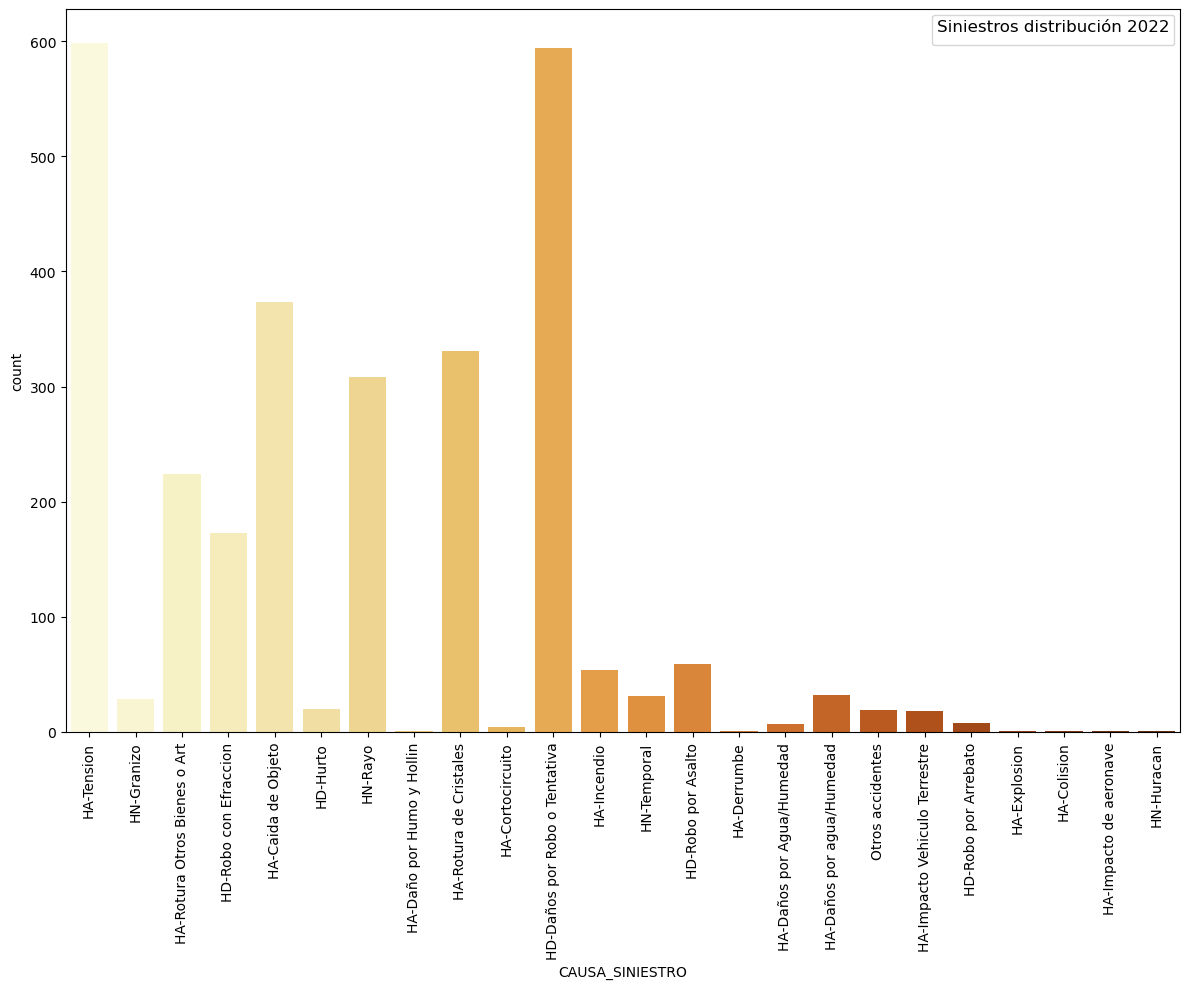

In [130]:
count_plots(data_new_siniestro, None, 'CAUSA_SINIESTRO', 'Siniestros distribución 2022')

In [240]:
# Datos de ejemplo
categorias = ['A', 'B', 'C', 'D']
si_valores = [30, 20, 10, 5]  # Porcentajes para 'Si'
no_valores = [70, 80, 90, 95]  # Porcentajes para 'No'

# Crear un DataFrame con los datos
import pandas as pd
df = pd.DataFrame({
    'Categorías': categorias * 2,  # Repetir las categorías para 'Si' y 'No'
    'Valores': si_valores + no_valores,  # Combinar los valores de 'Si' y 'No'
    'Tipo': ['Si'] * len(categorias) + ['No'] * len(categorias)  # Etiquetas de 'Si' y 'No'
})

# Crear el gráfico de barras apiladas
fig = px.bar(df, x='Categorías', y='Valores', color='Tipo',
             title='Porcentaje de Si/No por Categoría',
             labels={'Categorías': 'Categoría', 'Valores': 'Porcentaje (%)', 'Tipo': 'Tipo'},
             height=400)

# Configurar el eje y para mostrar la cantidad
fig.update_layout(yaxis_title='Cantidad')

# Agregar anotaciones de porcentaje
for categoria in categorias:
    si_porcentaje = df[(df['Categorías'] == categoria) & (df['Tipo'] == 'Si')]['Valores'].values[0]
    no_porcentaje = df[(df['Categorías'] == categoria) & (df['Tipo'] == 'No')]['Valores'].values[0]
    
    fig.add_trace(go.Scatter(x=[categoria], y=[si_porcentaje + no_porcentaje], mode='text',
                             text=[f'{si_porcentaje:.2f}% / {no_porcentaje:.2f}%'],
                             textposition='top center', showlegend=False))

# Mostrar el gráfico
fig.show()




In [132]:

total_siniestros = data_new_siniestro['CAUSA_SINIESTRO'].value_counts().reset_index()
total_siniestros.columns = ['CAUSA_SINIESTRO', 'Total_Siniestros']


porcentaje_pago_no_pago = data_new_siniestro.groupby(['CAUSA_SINIESTRO', 'FLG_PAGO']).size().unstack(fill_value=0)
porcentaje_pago_no_pago = porcentaje_pago_no_pago.div(porcentaje_pago_no_pago.sum(axis=1), axis=0) * 100
porcentaje_pago_no_pago.reset_index(inplace=True)


df_merged = pd.merge(total_siniestros, porcentaje_pago_no_pago, on='CAUSA_SINIESTRO')
fig = go.Figure()

for index, row in df_merged.iterrows():
    causa = row['CAUSA_SINIESTRO']
    total_siniestros = row['Total_Siniestros']
    porcentaje_pago = row[1]  
    porcentaje_no_pago = row[0]  

    fig.add_trace(go.Bar(
        x=[causa],
        y=[total_siniestros],
        text=[f'{porcentaje_pago:.2f}% / {porcentaje_no_pago:.2f}%'],
        name=f'{porcentaje_pago:.2f}% / {porcentaje_no_pago:.2f}%',
        textposition='outside'
    ))

fig.update_layout(
    xaxis=dict(title='Causa del Siniestro'),
    yaxis=dict(title='Cantidad'),
    barmode='stack',
    title='Porcentaje de Pago/No Pago por Causa del Siniestro'
)

fig.show()

#color_discrete_sequence=px.colors.sequential.Oranges




In [138]:
total_siniestros = data_new_siniestro['CAUSA_SINIESTRO'].value_counts().reset_index()
total_siniestros.columns = ['CAUSA_SINIESTRO', 'Total_Siniestros']
Dic_label = {'CAUSA_SINIESTRO': 'Causa del Siniestro', 'Total_Siniestros': 'Cantidad Total'}
barra_plot(total_siniestros,'CAUSA_SINIESTRO','Total_Siniestros', 'Cantidad Total de Siniestros por Causa del Siniestro',Dic_label,'Causa del Siniestro','Cantidad Total')

In [139]:
porcentaje_pago_no_pago = data_new_siniestro.groupby(['CAUSA_SINIESTRO', 'FLG_PAGO']).size().unstack(fill_value=0)
porcentaje_pago_no_pago = porcentaje_pago_no_pago.div(porcentaje_pago_no_pago.sum(axis=1), axis=0) * 100
porcentaje_pago_no_pago.reset_index(inplace=True)

color_discrete_map = {
    0: 'rgb(242,242,242)',  # Color naranja para  0
    1: '#FECB52',   # Color blanco para 1
}

Dic_labels1={'CAUSA_SINIESTRO': 'Causa del Siniestro', 'value': 'Porcentaje (%)', 'FLG_PAGO': 'Pago/No Pago'}

barra_plot(porcentaje_pago_no_pago,'CAUSA_SINIESTRO',[0,1], 'Porcentaje de distribución de condición por si Pago/No se Pago la Causa del Siniestro',Dic_labels1,'Causa del Siniestro','Porcentaje (%)')


In [ ]:
def count_plots(data, hue, x, title):
    fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(12,10))

    sns.countplot(x=x, hue=hue,data=data, ax=axs, palette="YlOrBr")
    sns.color_palette(palette="YlOrBr", n_colors=None, desat=None, as_cmap=False)

    axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)

    plt.legend(title=title, fontsize='small', title_fontsize='12', loc='upper right')

    fig.tight_layout()

    plt.show()

    return

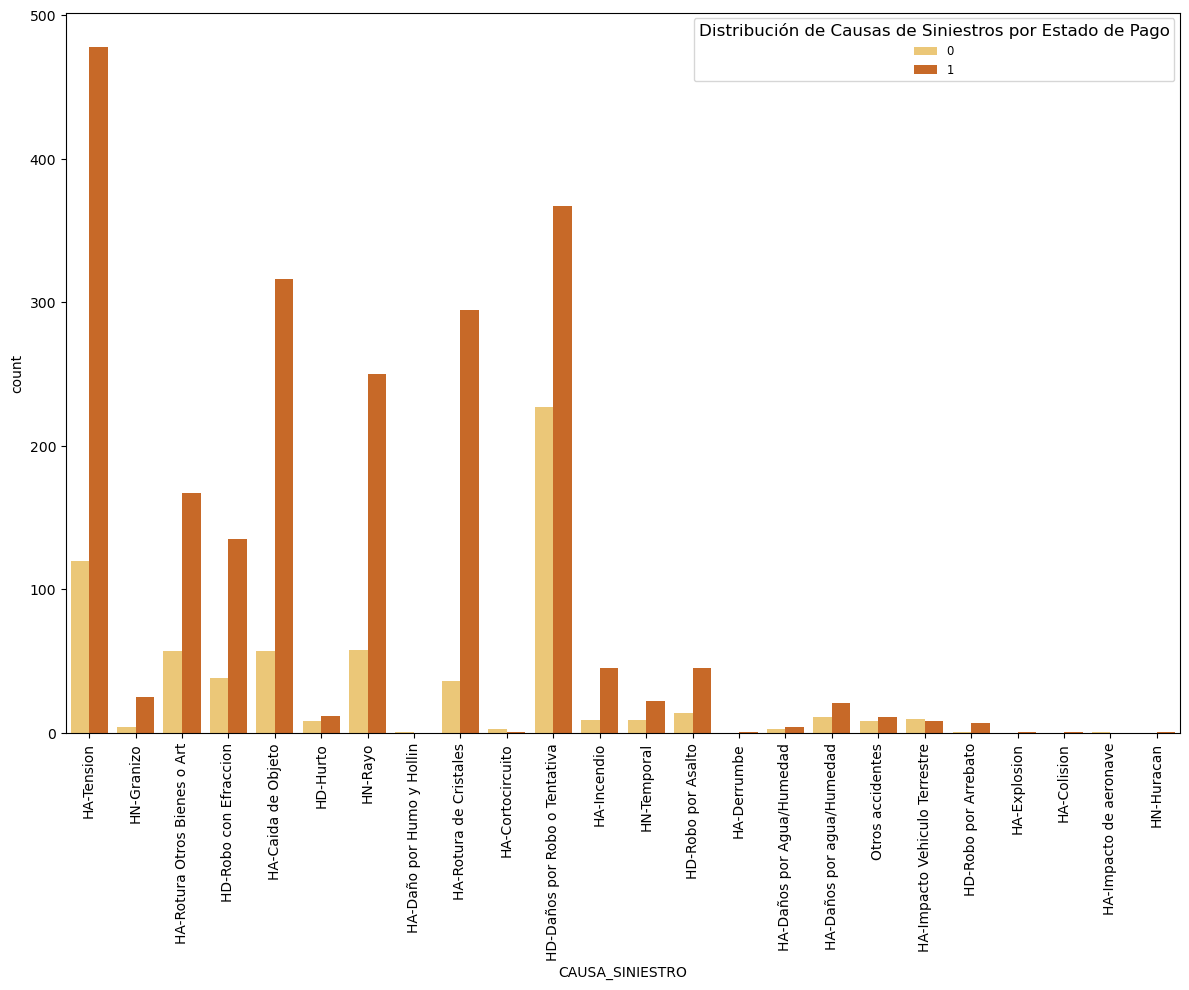

In [140]:
count_plots(data_new_siniestro, 'FLG_PAGO','CAUSA_SINIESTRO','Distribución de Causas de Siniestros por Estado de Pago' )

    TENENCIAS DE COBERTURAS POR CLIENTE DEL BANCO

In [22]:
Data_new_tenencias = Limpieza_tenencias(data_tenencias)
Data_new_tenencias

ACCIDENTES_PERSONALES_CORE_1  ACCIDENTES_PERSONALES_CORE_2  \
0                                  0                             0   
1                                  1                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
190147                             0                             0   
190148                             0                             0   
190149                             0                             0   
190150                             0                             0   
190151                             0                             0   

        AERONAVEGACION_CORE_2  ART_CORE_2  AUI_AUTOS_DE_QBE_CORE_2  \
0                           0           0                        0   
1                           0           0                        0   
2                           0           0                        0   
3                           0           0                        0   
4                           0           0                        0   
...                       ...         ...                      ...   
190147                      0           0                        0   
190148                      0           0                        0   
190149                      0           0                        0   
190150                      0           0                        0   
190151                      0           0                        0   

        AUTOMOTORES_CORE_2  CAUCION_CORE_1  CAUCION_CORE_2  \
0                        0               0               0   
1                        0               0               0   
2                        0               0               0   
3                        0               0               0   
4                        0               0               0   
...                    ...             ...             ...   
190147                   0               0               0   
190148                   0               0               0   
190149                   0               0               0   
190150                   0               0               0   
190151                   0               0               0   

        COMBINADO_FAMILIAR_CORE_1  COMBINADO_FAMILIAR_CORE_2  ...  \
0                               0                          0  ...   
1                               0                          0  ...   
2                               0                          0  ...   
3                               1                          0  ...   
4                               0                          0  ...   
...                           ...                        ...  ...   
190147                          0                          0  ...   
190148                          0                          0  ...   
190149                          1                          0  ...   
190150                          0                          0  ...   
190151                          0                          0  ...   

        VIDA_INDIVIDUAL_CORE_2  VIDA_OBLIGATORIO_CORE_1  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
190147                       0                        0   
190148                       0                        0   
190149                       0                        0   
190150                       0                        0   
190151                       0                        0   

        VIDA_OBLIGATORIO_CORE_2  CANT_POL_V

In [211]:
columnas = Data_new_tenencias.iloc[:,:43]

column_names = []
sumas_core1 = []
sumas_core2 = []

for columna in columnas.columns:
    if columna.endswith("_CORE_1"):
        suma_core1 = columnas[columna].sum()
        column_names.append(columna)
        sumas_core1.append(suma_core1)
        sumas_core2.append(0)
    elif columna.endswith("_CORE_2"):
        suma_core2 = columnas[columna].sum()
        column_names.append(columna)
        sumas_core1.append(0)
        sumas_core2.append(suma_core2)

suma_total = [sum(x) for x in zip(sumas_core1, sumas_core2)]
tipo = ["CORE_1" if columna.endswith("_CORE_1") else "CORE_2" for columna in column_names]

df_suma = pd.DataFrame({
    "Columna": column_names,
    "y": suma_total,
    "Tipo": tipo
})


In [212]:
color_discrete_map = {
    0: 'Orange',  # Color naranja para FLG_PAGO igual a 0
    1: '#FECB52',   # Color amarillo para FLG_PAGO igual a 1
}

fig = px.histogram(df_suma, x="Columna", y="y",
             color='Tipo', barmode='group',
             histfunc='avg',
             height=400, color_discrete_sequence= color_discrete_map)

fig.update_layout(width=800, height=600)

fig.show()

In [130]:
merge_tenencias = Data_new_tenencias.merge(data_pyme[['KEY_CLIENT', 'PROVINCIA']], on='KEY_CLIENT', how='left') 

In [157]:
merge_tenencias_personas = Data_new_tenencias.merge(data_limpieza_new[['KEY_CLIENT', 'PROVINCIA']], on='KEY_CLIENT', how='left') 

In [160]:
merge_tenencias_personas.dropna(subset=['PROVINCIA'], inplace=True)

In [137]:
merge_tenencias['PROVINCIA'].value_counts()

Buenos Aires           96715
Santa Fe               17653
Cordoba                 9721
Mendoza                 6572
Entre Rios              3535
Corrientes              3077
Tucuman                 2672
Salta                   2413
Chaco                   2393
Misiones                2127
Rio Negro               1960
Santiago del Estero     1858
Formosa                 1609
Neuquen                 1598
Catamarca               1494
Jujuy                   1258
Chubut                  1226
San Juan                1183
La Rioja                1173
Tierra Del Fuego        1109
La Pampa                 944
San Luis                 942
Ushuaia                  879
Santa Cruz               859
Name: PROVINCIA, dtype: int64

In [161]:
Prueba = merge_tenencias_personas.groupby('PROVINCIA').sum().reset_index()

In [162]:
Transpuesta = Prueba.transpose()
Transpuesta.columns = Transpuesta.iloc[0].str.strip()
Transpuesta = Transpuesta[1:]
Transpuesta = Transpuesta.reset_index()
Transpuesta = Transpuesta.rename(columns={'index': 'COBERTURAS'})
Transpuesta = Transpuesta.rename_axis(None, axis=1)
Transpuesta

COBERTURAS Buenos Aires Catamarca Chaco Chubut  \
0      ACCIDENTES_PERSONALES_CORE_1        12601       430   582    615   
1      ACCIDENTES_PERSONALES_CORE_2            4         0     0      0   
2             AERONAVEGACION_CORE_2            0         0     0      0   
3                        ART_CORE_2           96         0     2      1   
4           AUI_AUTOS_DE_QBE_CORE_2           10         0     0      1   
5                AUTOMOTORES_CORE_2         1270        24    28     56   
6                    CAUCION_CORE_1          144         0     3      4   
7                    CAUCION_CORE_2           21         0     0      0   
8         COMBINADO_FAMILIAR_CORE_1        16622       290   478    484   
9         COMBINADO_FAMILIAR_CORE_2            0         0     0      0   
10                   CREDITO_CORE_2            0         0     0      0   
11                 DESEMPLEO_CORE_1           96         8     9      7   
12                     DOTAL_CORE_1          211         2     2      1   
13        DOTAL_RENOVACIONES_CORE_1            9         0     0      0   
14    EMBARACIONES_DE_PLACER_CORE_2            0         0     1      0   
15                    GANADO_CORE_1          131         1     1      3   
16                    GANADO_CORE_2            0         0     0      0   
17                   GRANIZO_CORE_2            0         0     0      0   
18                  INCENDIO_CORE_2            2         0     0      0   
19      INTEGRAL_DE_COMERCIO_CORE_1          713        21     9     28   
20      INTEGRAL_DE_COMERCIO_CORE_2           16         0     0      0   
21     INTEGRAL_DE_CONSORCIO_CORE_2            0         0     0      0   
22             MOTOVEHICULOS_CORE_2            1         0     0      0   
23               PARAMETRICO_CORE_2            0         0     0      0   
24               RC_PATRONAL_CORE_2            1         0     0      0   
25           RESPONSAB_CIVIL_CORE_2            4         0     0      0   
26            RIESGOS_VARIOS_CORE_1         5101       100   132    141   
27                      ROBO_CORE_2            0         0     0      0   
28  ROBO_Y_RIESGOS_SIMILARES_CORE_1         9375       276   276    293   
29                     SALUD_CORE_1           22         4     1      2   
30                     SALUD_CORE_2            1         0     0      0   
31            SEGURO_TECNICO_CORE_1            5         0     1      1   
32            SEGURO_TECNICO_CORE_2           14         0     0      1   
33         SEPELIO_COLECTIVO_CORE_1          299        14     6      3   
34     TODO_RIESGO_OPERATIVO_CORE_2           13         0     0      0   
35                TRANSPORTE_CORE_2            0         0     0      0   
36            VIDA_COLECTIVO_CORE_1         2155       314   335    270   
37            VIDA_COLECTIVO_CORE_2            0         0     0      0   
38           VIDA_INDIVIDUAL_CORE_1         7511       209   202    314   
39           VIDA_INDIVIDUAL_CORE_2            0         0     0      0   
40          VIDA_OBLIGATORIO_CORE_1           55         0     2      1   
41          VIDA_OBLIGATORIO_CORE_2            0         0     0      0   
42                CANT_POL_VIGENTES        18752       464   516    776   
43                  FLG_SIP_VIGENTE          294        11     5     11   
44                 Total_coberturas        56503      1693  2070   2226   
45           Cantidad_real_vigentes        29128       744   997   1097   
46                       Suma_core1        55050      1669  2039   2167   
47                       Suma_core2         1453        24    31     59   

   Ciudad Autónoma de Buenos Aires Corrientes Córdoba Entre Ríos Formosa  ...  \
0                             4759        733    3446        699     347  ...   
1                                5          0       0          0       0  ...   
2                                0          0       0          0       0  ...   
3                        

In [163]:
filter = Transpuesta.iloc[:42,:]

colores_personalizados = px.colors.sequential.Oranges[::-1]

fig = px.histogram(filter, x='COBERTURAS', y=filter.columns, histfunc='sum', height=300,
                    title='Histogram Chart', color_discrete_sequence= colores_personalizados)

# fig = px.bar(filter, x="COBERTURAS", y= filter.columns, barmode='group',
#              height=400)

fig.update_layout(width=800, height=600)

fig.show()

Distribución de los clientes por Provincia

In [166]:
data_limpieza_new = Limpieza_personas(data_personas, data_pyme)

No handles with labels found to put in legend.


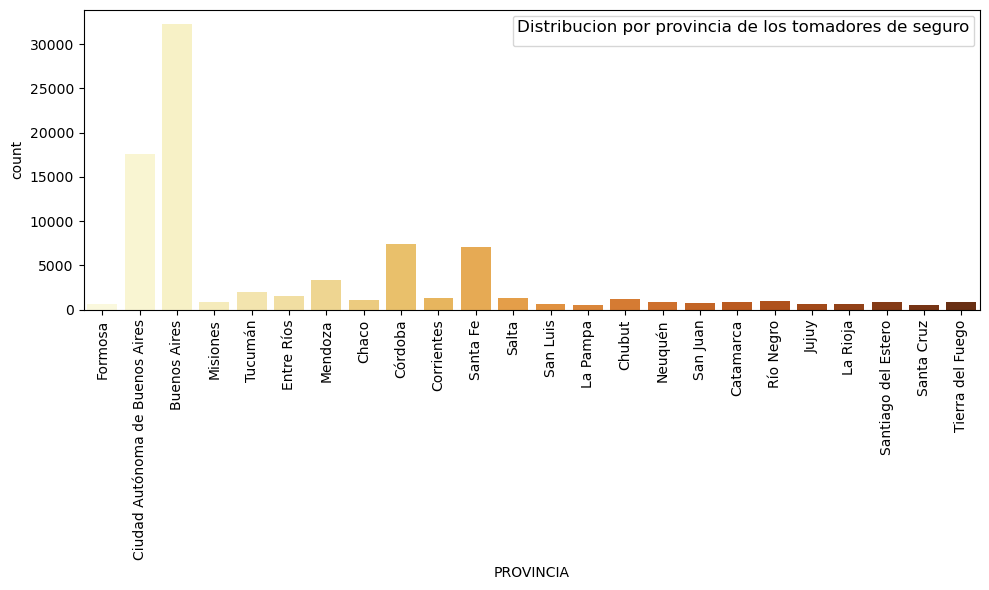

In [156]:
count_plots(data_limpieza_new, None, 'PROVINCIA', 'Distribucion por provincia de los tomadores de seguro')

    Caracteristicas de las Pymes

    Historico de Contactos Entre el banco y los clientes durante 2022

In [113]:
Data_new_contactos  = Limpieza_contactos(data_contactos)

C:\Users\102140\AppData\Local\Temp\ipykernel_19124\1042689587.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
Suma_data = Data_new_contactos.groupby(by=['FECHA_GESTION','DESC_GEST'])['IN_OUT'].count().reset_index()

Suma_data['FECHA_GESTION'] = pd.to_datetime(Suma_data['FECHA_GESTION'], dayfirst=True)

data_mes_a_mes = Suma_data.groupby(['DESC_GEST', pd.Grouper(key='FECHA_GESTION', freq='M')])['IN_OUT'].sum().reset_index()

data_mes_a_mes

DESC_GEST FECHA_GESTION  IN_OUT
0             ALTA    2021-11-30      26
1             ALTA    2021-12-31     423
2             ALTA    2022-01-31     239
3             ALTA    2022-02-28      30
4             ALTA    2022-03-31       9
..             ...           ...     ...
468  VENTA UPGRADE    2022-08-31    1417
469  VENTA UPGRADE    2022-09-30    2977
470  VENTA UPGRADE    2022-10-31    2626
471  VENTA UPGRADE    2022-11-30    3302
472  VENTA UPGRADE    2022-12-31    3055

[473 rows x 3 columns]

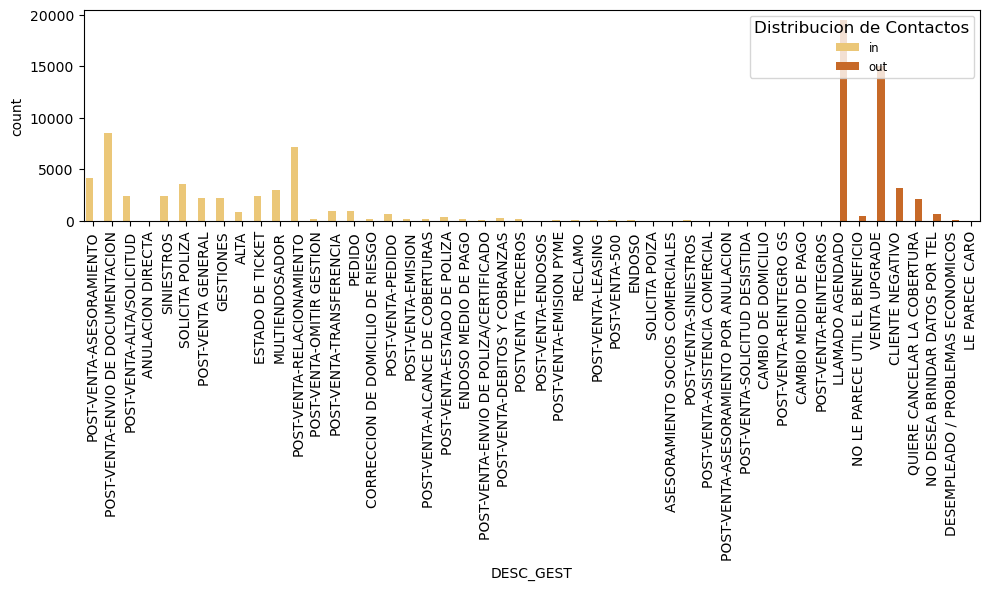

In [148]:
count_plots(Data_new_contactos, 'IN_OUT', 'DESC_GEST', "Distribucion de Contactos")

In [125]:
linea_tendencia(data_mes_a_mes, "IN_OUT", "FECHA_GESTION", "DESC_GEST", "Serie de tiempo por los distintos tipos de gestion")

In [122]:
scatter_plot(Data_new_contactos, 'FECHA_GESTION', 'cant_contactos_tipo_DESC_GEST', 'IN_OUT', "<b>Contactos</b> Distribucion de los contactos por mes")

#Puedo considerar data en 2022 hasta diciembre

Certificados por Antiguedad

In [53]:
Limpieza_certificados(data_certificado)

ANTIGUEDAD_CLIENTE ANTIGUEDAD_POLIZA_MAS_RECIENTE  \
0              4560 days                      4560 days   
1              4052 days                      4052 days   
2              5383 days                      2320 days   
3              4196 days                      4196 days   
4              5466 days                      1705 days   
...                  ...                            ...   
83902          2603 days                      2603 days   
83903          3490 days                      3490 days   
83904          2572 days                      1983 days   
83905          2653 days                       543 days   
83906          2468 days                      2267 days   

                                              KEY_CLIENT  \
0      51c79997f0b7446fecde2d0248eeff0bcba9b9e4411497...   
1      c6e1f36191e7bdccbf2045cf394db38304a1a5a560008c...   
2      330b2682647e9da65841b5b44c72994b66fe551f39f8ad...   
3      04cdd2d80899b576f1edcfdce3980f51e4781b6bd59a6a...   
4      2e277df9ce63726feea8b06aca1d9603ac0edebbf52650...   
...                                                  ...   
83902  af13c179ca3ca95fcbc512ca9925f9e30346792ebc7aff...   
83903  14377b3521079e1c20a7e5047b6c81dc8a6d3155ccfbca...   
83904  2c83721efa0bb61b13097bad0e1d42ed2293b4875393ad...   
83905  8693ebd71ce6b38641b971f1994e7b91b5bbcaba3453bf...   
83906  5af9fac2623f8b087f4d85c62cccfbfa997f000ce5a5f6...   

      fecha_antiguedad_cliente fecha_antiguedad_ulit_poliza  \
0                   2010-07-07                   2010-07-07   
1                   2011-11-27                   2011-11-27   
2                   2008-04-05                   2016-08-24   
3                   2011-07-06                   2011-07-06   
4                   2008-01-13                   2018-05-01   
...                        ...                          ...   
83902               2015-11-15                   2015-11-15   
83903               2013-06-11                   2013-06-11   
83904               2015-12-16                   2017-07-27   
83905               2015-09-26                   2021-07-06   
83906               2016-03-29                   2016-10-16   

      fecha_sin_interaccion  
0                 4560 days  
1                 4052 days  
2                 3063 days  
3                 4196 days  
4                 3761 days  
...                     ...  
83902             2603 days  
83903             3490 days  
83904              589 days  
83905             2110 days  
83906              201 days  

[83907 rows x 6 columns]